# Problem Set 5 

[your name] Luis Rubén González Márquez

[working title of the project] Repression and politization of protest in Latin America under neoliberal poliarchies

[date] 04/22/2020

### 1. Develop hypotheses involving a muli-item scale as either a dependent variable (DV) or independent variable (IV) [1 pt]

Do the following when you write your hypothesis:

    A. Write a couple sentences about the theoretical reasons (prior knowledge / research) for why you think that multiple dependent or independent variables of interest are correlated with eachother in one or more groupings
    **For our multiscale, we are proposing an Independent Variable called Politization of conflict events in Latin America. The consideration of what is political or what is not comes from an expanded understanding that includes not only the goals; it also includes the means employed. Thus, in the variables of the scale we include the political issues of the conflict from the dataset's register of the first, second and third issues. In addition, another variables is if this conflict was directed was directed to the local or regional government, or central government. We also inclyde the types of mobilization since some of them were political by definition (as intra, extra, inter or anti governmental), and if the conflic escalated into political pne (the same categories as with type). The logic of the scale is that the more political elements either of means and goals, the more politicized a conflict is. 
    
    
    B. Tell us a 1-word variable name that you will assign to each multi-item scale that you think could well represent your potentially correlated variables. The 1-word variable names should reflect your theory in response to prompt A above.
   *pol_conf
    
    C. State the predicted direction of association between your dependent variable DV (multi-item scales or otherwise) and independent variables (IVs) (multi-item scales or otherwise) in your proposed model. You can predict no relationship if you do not expect a relationship.
    **If collective conflicts increased its politization in Latin America under neoliberal poliarchies, then there is an increase in the likelihood of a repressive response from the state    

### 2. Estimate a correlation matrix [1 pt]

    A. The matrix should include at least 4 independent or dependent variables (but not both) that you want to include in your multi-item scales
    Depenendent variable: repression
    Independent variable: scale of politization of conflict, comprised of
    -Politization of issues (at least one political issue between the there possibles)
    -Political of types of conflict
    -Political escalation of conflict
    -Government institutions as target of conflict (either local-regional or central, or both)
    
    
    B. Make a list in this markdown cell that categorizes each potential correlation as strong or weak
    Politization of issue and political type. Negative

Politization of issue and political escalation. Weak

Politization of issue and government target. Strong

Political type and political escalation. Negative

Political type and government target. Negative

Political escalation and government target. Weak
    
    C. Standardize the 4 variables so that they are all positively correlated
    * The 4 variables of the scale were standardized so moving from 1 to 2 implies moving from unpolitical to politization

In [1]:
insheet using SCAD2018LatinAmerica_Final.csv, clear
qui keep repress issue1 issue2 issue3 cgovtarget rgovtarget escalation etype


(44 vars, 5,602 obs)



In [2]:
%set graph_format svg

In [3]:
foreach var in issue1 issue2 issue3 {
    recode `var' (1=1) (2=0) (3=0) (4=0) (5=0) (6=0) (7=0) (8=1) (9=1) (10=1) (11=1) (12=0) (13=0) (14=0), gen(pol`var')
}

foreach var in escalation etype {
    recode `var' (1=0) (2=0) (3=0) (4=0) (5=0) (6=0) (7=1) (8=1) (9=1) (10=1) , gen(pol`var')
}
*The variables of the scale are standardize following this logic: they will have a score of 1 if they do not have any political element (issues or targets, following the codebook), 2 if they have at least one (issue or target) and 3 for more (the addition dependending on how many political issues or targets were involved). For escalation and type, we only consider types of conflict that are political in nature (pro, intra extra and anti government protest)
*Could you do an scale with dummy variables? And with a 0? Do they index of the scale have to have the same numbers in each scale or they can have different although equal in value (the dilemma of multiple in this dataset, without it in etype and escalation)


(5201 differences between issue1 and polissue1)
(751 differences between issue2 and polissue2)
(70 differences between issue3 and polissue3)

(464 differences between escalation and polescalation)
(5602 differences between etype and poletype)


In [4]:
gen govtarget= cgovtarget + rgovtarget
egen polissue= rowtotal(polissue1 polissue2 polissue3)

In [5]:
foreach var in polissue polescalation poletype govtarget {
recode `var'(3=2) (4=2) (5=2) (6=2) (7=2) (1=2) (0=1)
}
tab polissue
tab polescalation
tab poletype
tab govtarget



(polissue: 5331 changes made)
(polescalation: 5602 changes made)
(poletype: 5602 changes made)
(govtarget: 5457 changes made)


   polissue |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      3,480       62.12       62.12
          2 |      2,122       37.88      100.00
------------+-----------------------------------
      Total |      5,602      100.00


  RECODE of |
 escalation |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      5,559       99.23       99.23
          2 |         43        0.77      100.00
------------+-----------------------------------
      Total |      5,602      100.00


  RECODE of |
      etype |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      3,031       54.11       54.11
          2 |      2,571       45.89      100.00
------------+-----------------------------------
      Total |      5,602      

In [6]:
pwcorr polissue poletype polescalation govtarget, sig 


             | polissue poletype polesc~n govtar~t
-------------+------------------------------------
    polissue |   1.0000 
             |
             |
    poletype |  -0.3529   1.0000 
             |   0.0000
             |
polescalat~n |   0.0325  -0.0523   1.0000 
             |   0.0149   0.0001
             |
   govtarget |   0.1166  -0.3145   0.0058   1.0000 
             |   0.0000   0.0000   0.6665
             |


### 3. Estimate factor loadings [1 pt]

    A. Estimate factor loadings for the variables you propose including in your multi-item scale(s)
    B. Rotate and plot the factor loadings
    C. Do the factor loadings support your hypothesis that multiple items should be grouped into a scale?
    *Partially, since it supports at least grouping for political escalation and political issues
    D. Do the factor loadings suggest any proposed items should not be included in your scale? Or that an additional scale is in order?
    *The results indicate that political type should be dropped from the scale, while it is not clear in the case of government target (one factor supports and the other does not).
    


(obs=5,602)

Factor analysis/correlation                      Number of obs    =      5,602
    Method: principal factors                    Retained factors =          2
    Rotation: (unrotated)                        Number of params =          6

    --------------------------------------------------------------------------
         Factor  |   Eigenvalue   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      0.69315      0.67852            1.6162       1.6162
        Factor2  |      0.01463      0.03497            0.0341       1.6504
        Factor3  |     -0.02034      0.23824           -0.0474       1.6029
        Factor4  |     -0.25858            .           -0.6029       1.0000
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(6)  = 1345.69 Prob>chi2 = 0.0000

Factor loadings (pattern matrix) and unique varianc

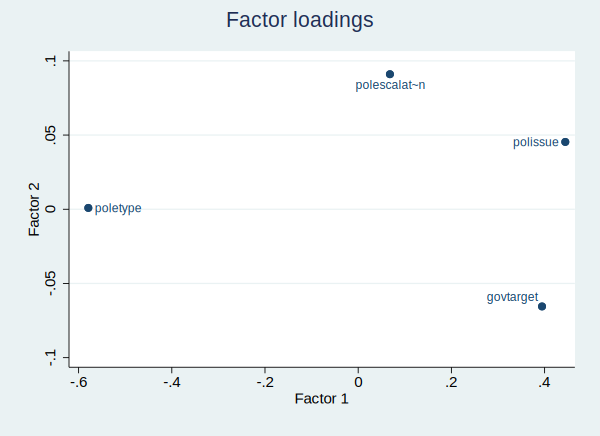

In [7]:
factor polissue poletype polescalation govtarget
loadingplot, norotated




Factor analysis/correlation                      Number of obs    =      5,602
    Method: principal factors                    Retained factors =          2
    Rotation: orthogonal varimax (Kaiser off)    Number of params =          6

    --------------------------------------------------------------------------
         Factor  |     Variance   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      0.69315      0.67851            1.6162       1.6162
        Factor2  |      0.01464            .            0.0341       1.6504
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(6)  = 1345.69 Prob>chi2 = 0.0000

Rotated factor loadings (pattern matrix) and unique variances

    -------------------------------------------------
        Variable |  Factor1   Factor2 |   Uniqueness 
    -------------+--------------------+----

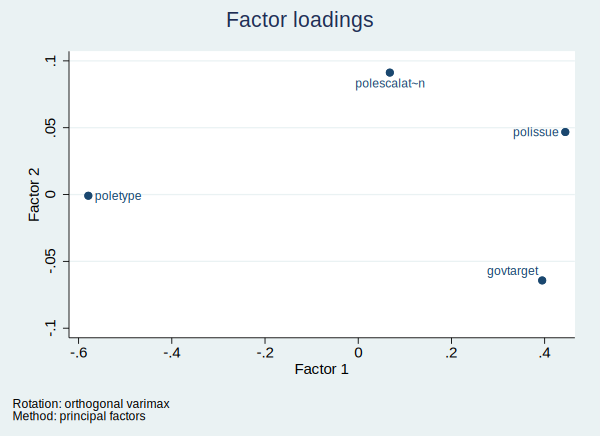

In [10]:
qui factor polissue poletype polescalation govtarget
rotate, varimax
loadingplot

### 4. Calculate the scales and test them in a regression model [1 pt]

    A. Generate new scale variables that average all the items in eacj scale.
    B. Standardize each scale to be 0-1
    C. Estimate separate models that regress your dependent variables on your independent variables 1) using the scale variables, and 2) using the separate component items of the scale variables
    D. Output your models (at least 2 models) using esttab so we can easily compare results

In [12]:
gen pol_conf1= (polescalation + govtarget + polissue)
replace pol_conf1 = pol_conf1-1
replace pol_conf1 = pol_conf1/2 if pol_conf !=0

In [13]:
gen pol_conf2= (polescalation + polissue)
replace pol_conf2 = pol_conf2-1
replace pol_conf2 = pol_conf2/2 if pol_conf !=0



(5,602 real changes made)

(5,602 real changes made)


In [19]:
est clear
qui eststo: regress repress polescalation polissue, ro
qui eststo: regress repress polescalation polissue govtarget, ro
qui eststo: regress repress polescalation polissue govtarget poletype, ro
qui eststo: regress repress pol_conf1, ro
qui eststo: regress repress pol_conf2, ro

In [21]:
esttab ///
, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
	legend starlevels(^ .1 * .05 ** .01 *** .001) ///
mlabels("Scalevar1" "Scalevar2" "Scalevar3" "Scale 1" "Scale 2") ///
collabels(none) keep(polescalation polissue govtarget pol_conf1 pol_conf2 poletype)


-------------------------------------------------------------------------------------------------
                      (1)              (2)              (3)              (4)              (5)    
                Scalevar1        Scalevar2        Scalevar3          Scale 1          Scale 2    
-------------------------------------------------------------------------------------------------
polescalat~n         0.02             0.01            -0.03                                      
                   (0.09)           (0.09)           (0.10)                                      
polissue             0.07 ***         0.04 **         -0.02                                      
                   (0.02)           (0.01)           (0.02)                                      
govtarget                             0.25 ***         0.20 ***                                  
                                    (0.01)           (0.01)                                      
poletype           

### 5. Interpret your regression estimates [1 pt]

    A. Which of your hypotheses were supported or rejected?
    *The hypothesis of the correlation of multiple variables in a scale of politization of conflict in Latin America was confimed, although not with all the variables first considered
    *The hypothesis of the increase of repression in association with the politization of conflict in Latin America is also supported
    B. Were the coefficients using your multi-item scales in the same direction as the coefficients for their component variables?
    In the regression we compared two versions of the scale and of the variables, either including or excluding government as targets. In all the cases the direction of association kept between the models with single variables and the multi-item scales. In addition, a model with the variables that included political type (the omited variable after the correlation and factoring) is the only one with a variable in a contrary direction, precisely the latter (excluded from the scale).
    C. Were the coefficients larger or more statistically significant when you used multi-item scales?
    *The coefficients in the multi-item model that excluded government as target, the Scale model 1, are the highest. Besides, the coefficients for political scalation in the models with variables were not significant, so it would not be considered for politization if a scale were not constructed. In the case of the multi-scale model that included government as target, the coefficients are not largert than the variable model including government target, specifically with  the coefficient for this last variable. For this reasons, the preferred model is the Scale 1 model, precisely based in the most firm results of the factor analysis for the independent variable. The results also point to consider the theorization and test of the interactions or intervention of government as a target in a subsequent analysis of repression and politization in recent conflicts in Latin America. 